#Project_ML

| Element            | Content |
|--------------------|---------|
| Features involved  | 30 WDBC features (e.g., radius, texture, area, perimeter, etc.) |
| Parameters         | w (weights) and b (bias) — hyperplane: f(x) = w·x + b |
| Hyperparameters    | C (regularization), learning rate, standardization, epochs |




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. CHARGEMENT ET PREMIER APERÇU
print("="*60)
print("🔍 ANALYSE EXPLORATOIRE DES DONNÉES MÉDICALES")
print("="*60)

df = pd.read_csv('data.csv')
print(f"📊 Dataset shape: {df.shape}")


🔍 ANALYSE EXPLORATOIRE DES DONNÉES MÉDICALES
📊 Dataset shape: (569, 33)


In [3]:
df.drop(['id' , 'Unnamed: 32'] ,axis=1 , inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#separate the features and the target 
X=df.drop('diagnosis' , axis=1)
y=df['diagnosis']

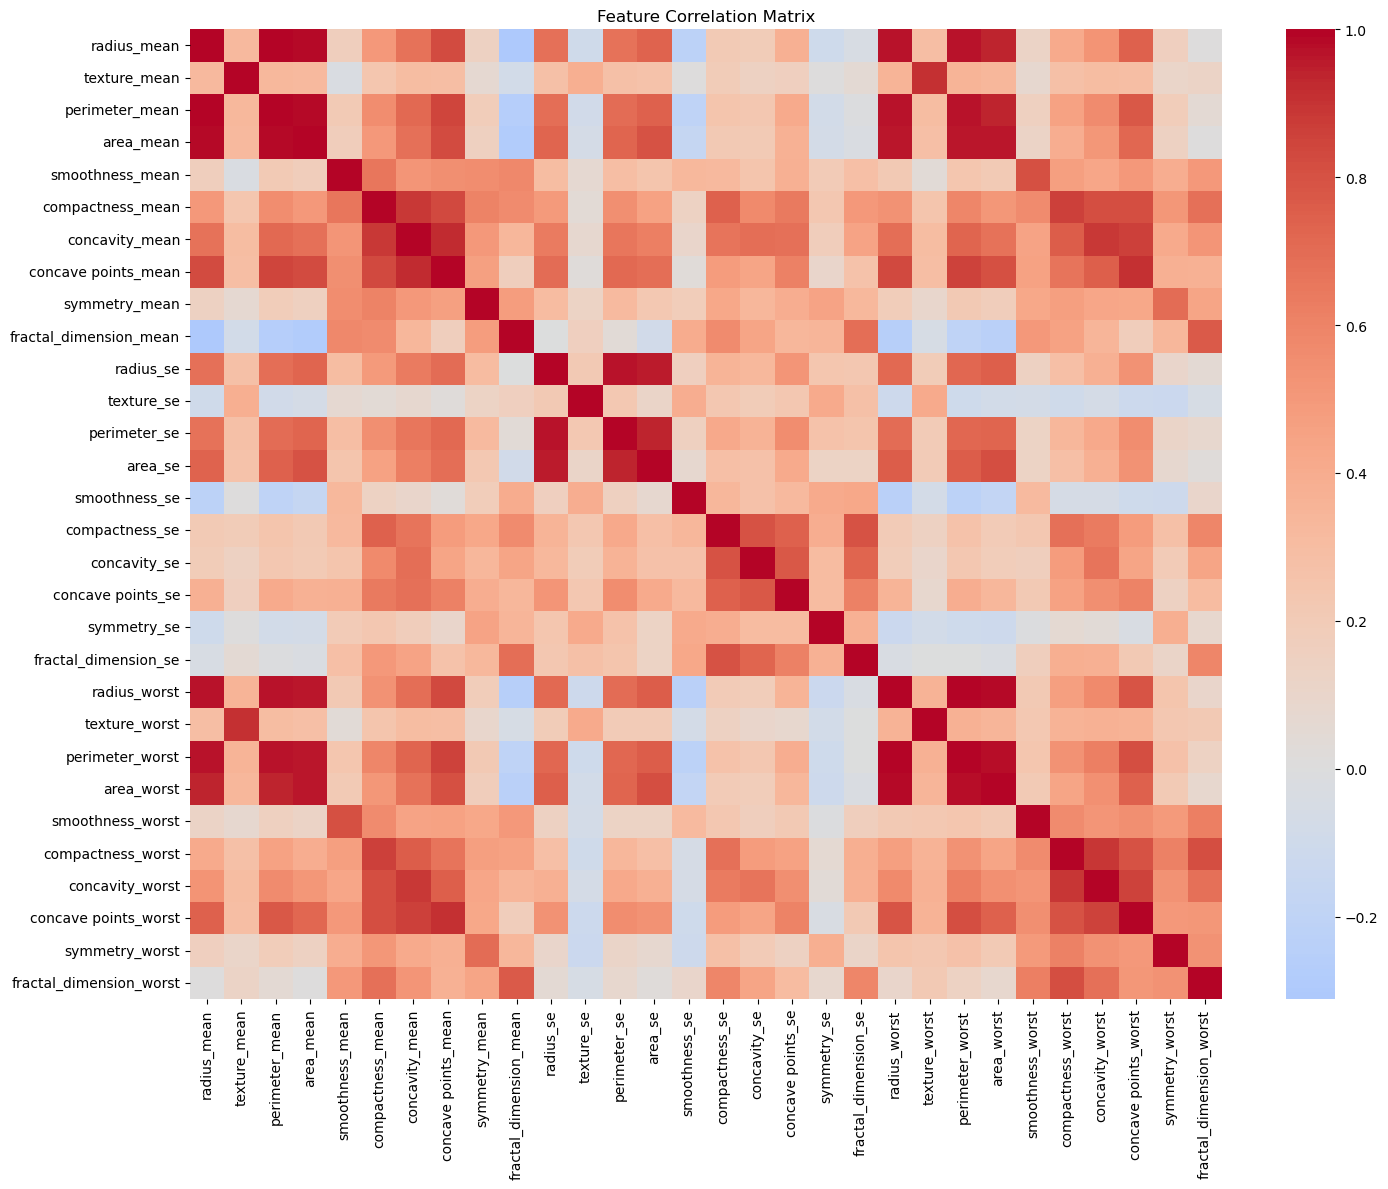

In [5]:
# look at how features are correlated 
correlation_matrix=X.corr()

plt.figure(figsize=(15,12))
sns.heatmap(correlation_matrix , annot=False , cmap='coolwarm' , center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [6]:
# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

# Standardize the features so all features will be on the same scale 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

Training set: (455, 30)
Testing set: (114, 30)


In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Créer et entraîner le modèle SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

# 2. Faire des prédictions
y_pred = svm_model.predict(X_test_scaled)

# 3. Calculer la précision
accuracy = accuracy_score(y_test, y_pred)

print(f" RÉSULTAT SVM: {accuracy*100:.2f}% de précision")

 RÉSULTAT SVM: 97.37% de précision



 MATRICE DE CONFUSION:
[[Vrais Négatifs  Faux Positifs]
 [Faux Négatifs  Vrais Positifs]]
[[72  0]
 [ 3 39]]


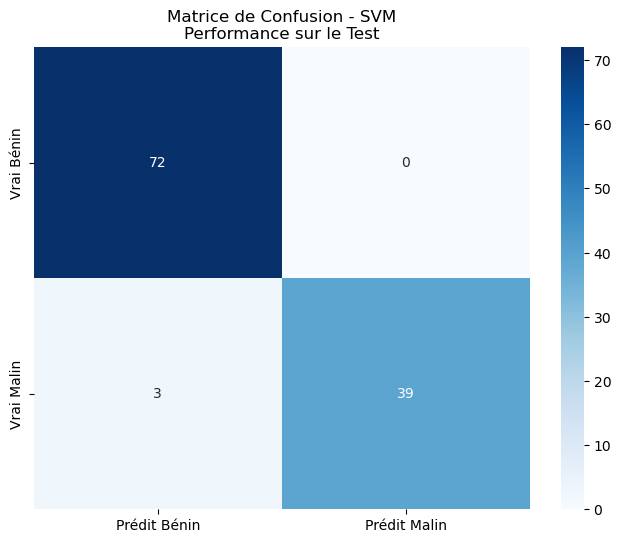


 MÉTRIQUES DÉTAILLÉES:
✅ SENSITIVITÉ (Recall Malin): 0.9286 (92.86%)
✅ SPÉCIFICITÉ (Recall Bénin): 1.0000 (100.00%)
✅ PRÉCISION (Précision Malin): 1.0000 (100.00%)
✅ F1-SCORE: 0.9630

📋 RAPPORT DE CLASSIFICATION DÉTAILLÉ:
              precision    recall  f1-score   support

       Bénin       0.96      1.00      0.98        72
       Malin       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114


🏁 SYNTHÈSE DES PERFORMANCES DU MODÈLE SVM
 EXCELLENTE PERFORMANCE !
📊 Précision globale: 97.37%
  Attention à la détection des tumeurs malignes
  Très bonne identification des tumeurs bénignes

 Résumé:
• Correctement classés: 111/114 patients
• Erreurs: 3/114 patients
• Faux négatifs (dangereux): 3 patients
• Faux positifs: 0 patients


In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. MATRICE DE CONFUSION
cm = confusion_matrix(y_test, y_pred)
print(f"\n MATRICE DE CONFUSION:")
print(f"[[Vrais Négatifs  Faux Positifs]")
print(f" [Faux Négatifs  Vrais Positifs]]")
print(cm)

# Affichage visuel de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Prédit Bénin', 'Prédit Malin'],
            yticklabels=['Vrai Bénin', 'Vrai Malin'])
plt.title('Matrice de Confusion - SVM\nPerformance sur le Test')
plt.show()

# 3. MÉTRIQUES DÉTAILLÉES
tn, fp, fn, tp = cm.ravel()

sensitivity = tp / (tp + fn)  # Capacité à détecter les vrais malins
specificity = tn / (tn + fp)  # Capacité à détecter les vrais bénins
precision = tp / (tp + fp)    # Exactitude des prédictions malins

print(f"\n MÉTRIQUES DÉTAILLÉES:")
print(f"✅ SENSITIVITÉ (Recall Malin): {sensitivity:.4f} ({sensitivity*100:.2f}%)")
print(f"✅ SPÉCIFICITÉ (Recall Bénin): {specificity:.4f} ({specificity*100:.2f}%)")
print(f"✅ PRÉCISION (Précision Malin): {precision:.4f} ({precision*100:.2f}%)")
print(f"✅ F1-SCORE: {2 * (precision * sensitivity) / (precision + sensitivity):.4f}")

# 4. RAPPORT DE CLASSIFICATION
print(f"\n📋 RAPPORT DE CLASSIFICATION DÉTAILLÉ:")
print(classification_report(y_test, y_pred, target_names=['Bénin', 'Malin']))

# 5. RÉCAPITULATIF DES PERFORMANCES
print("\n" + "="*60)
print("🏁 SYNTHÈSE DES PERFORMANCES DU MODÈLE SVM")
print("="*60)

if accuracy > 0.97:
    performance = " EXCELLENTE"
elif accuracy > 0.95:
    performance = " TRÈS BONNE" 
elif accuracy > 0.90:
    performance = " BONNE"
else:
    performance = " À AMÉLIORER"

print(f"{performance} PERFORMANCE !")
print(f"📊 Précision globale: {accuracy*100:.2f}%")

if sensitivity > 0.95:
    print(" Très bonne détection des tumeurs malignes")
else:
    print("  Attention à la détection des tumeurs malignes")

if specificity > 0.95:
    print("  Très bonne identification des tumeurs bénignes")
else:
    print(" Vérifier l'identification des tumeurs bénignes")

print(f"\n Résumé:")
print(f"• Correctement classés: {(tp + tn)}/{len(y_test)} patients")
print(f"• Erreurs: {(fp + fn)}/{len(y_test)} patients")
print(f"• Faux négatifs (dangereux): {fn} patients")
print(f"• Faux positifs: {fp} patients")



In [9]:
# Pour vérifier définitivement l'overfitting :
train_accuracy = svm_model.score(X_train_scaled, y_train)
test_accuracy = accuracy_score(y_test, y_pred)

print(f" COMPARAISON TRAIN/TEST:")
print(f"   • Accuracy entraînement: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"   • Accuracy test: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"   • Écart: {abs(train_accuracy - test_accuracy):.4f}")

if abs(train_accuracy - test_accuracy) > 0.05:
    print("  POTENTIEL OVERFITTING - Écart important")
else:
    print(" PAS D'OVERFITTING - Performances stables")

 COMPARAISON TRAIN/TEST:
   • Accuracy entraînement: 0.9868 (98.68%)
   • Accuracy test: 0.9737 (97.37%)
   • Écart: 0.0131
 PAS D'OVERFITTING - Performances stables
